### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Sumamos todas las ventas de cada tienda
vtas01 = tienda['Precio'].sum()
vtas02 = tienda2['Precio'].sum()
vtas03 = tienda3['Precio'].sum()
vtas04 = tienda4['Precio'].sum()

#Mostramos la suma total de las tiendas
print("Ventas total tienda01: ", vtas01)
print("Ventas total tienda01: ",vtas02)
print("Ventas total tienda01: ",vtas03)
print("Ventas total tienda01: ",vtas04)

#Ahora creamos una funcion para sacar el promedio de las ventas de las tiendas
def promedio_ventas(vtas01, vtas02, vtas03, vtas04):
  promedio = (vtas01 + vtas02 + vtas03 + vtas04) / 4
  promedio = round(promedio, 2)
  formato_moneda = "${:,.0f}".format(promedio)
  return promedio

print(f"Promedio de ventas: ", promedio_ventas(vtas01, vtas02, vtas03, vtas04))


Ventas total tienda01:  1150880400.0
Ventas total tienda01:  1116343500.0
Ventas total tienda01:  1098019600.0
Ventas total tienda01:  1038375700.0
Promedio de ventas:  1100904800.0


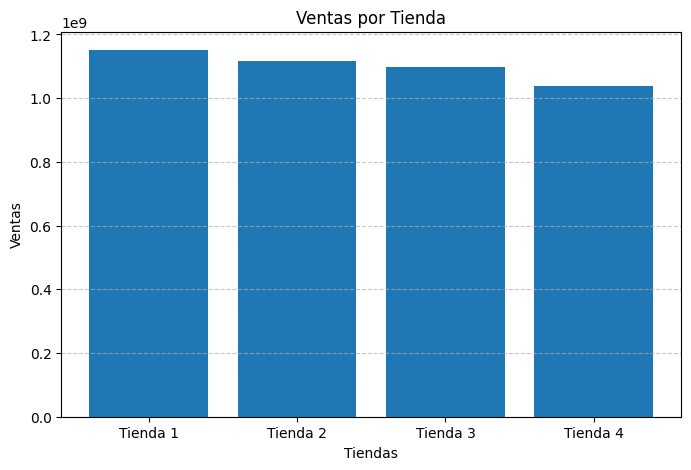

In [3]:
import matplotlib.pyplot as plt
# Creamos una lista llamando a las tiendas y una segunda lista con los nombres que usaran
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

#Crearemos un grafico de barra
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, [vtas01, vtas02, vtas03, vtas04])

#Estos son nuestros label
plt.xlabel('Tiendas')
plt.ylabel('Ventas')
plt.title('Ventas por Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



# 2. Ventas por categoría

In [4]:
#Sumamos todas las ventas de cada tienda
vtas01 = tienda['Precio'].sum()
vtas02 = tienda2['Precio'].sum()
vtas03 = tienda3['Precio'].sum()
vtas04 = tienda4['Precio'].sum()

def ventas_por_categoria(tienda, tienda2, tienda3, tienda4):
  #Sumamos la categoria de los productos:
  categorias_tienda = tienda.groupby('Categoría del Producto')['Precio'].sum()
  categorias_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
  categorias_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
  categorias_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

  categorias_tienda = categorias_tienda.add(categorias_tienda2, fill_value=0)
  categorias_tienda = categorias_tienda.add(categorias_tienda3, fill_value=0)
  categorias_tienda = categorias_tienda.add(categorias_tienda4, fill_value=0)
  #Mostramos precios ascendentes:
  categorias_tienda = categorias_tienda.sort_values(ascending=False)

  #Creamos un index, Columnas, las categorias usando Lambda y dando el formato moneda
  categorias_tienda = categorias_tienda.reset_index()
  categorias_tienda.columns = ['Categoría del Producto', 'Ventas']
  categorias_tienda['Ventas'] = categorias_tienda['Ventas'].apply(lambda x: "${:,.0f}".format(x))
  categorias_tienda = categorias_tienda.set_index('Categoría del Producto')
  categorias_tienda.index.name = None
  return categorias_tienda

print(ventas_por_categoria(tienda, tienda2, tienda3, tienda4))


                                 Ventas
Electrónicos             $1,660,576,500
Electrodomésticos        $1,324,751,100
Muebles                    $757,661,000
Instrumentos musicales     $348,772,600
Deportes y diversión       $142,977,700
Juguetes                    $73,604,400
Artículos para el hogar     $57,579,800
Libros                      $37,696,100


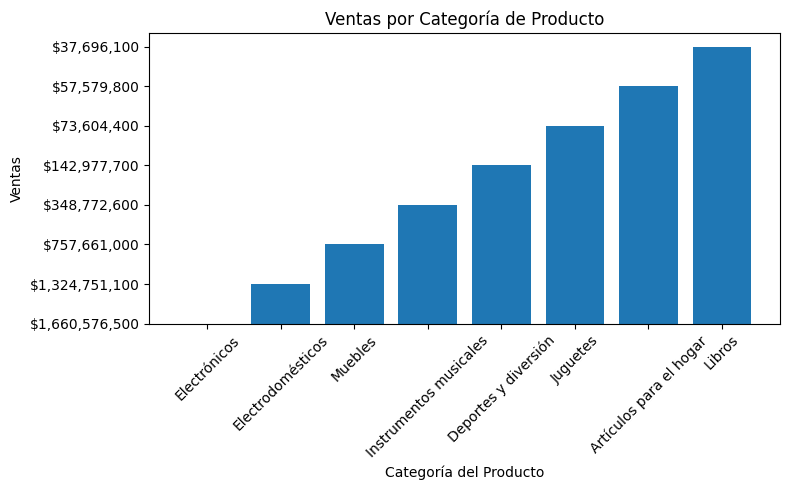

In [5]:
# Importamos la librerias
import matplotlib.pyplot as plt
import pandas as pd

#Concatenamos la matriz de la tienda:
categorias_tienda = ventas_por_categoria(tienda, tienda2, tienda3, tienda4)
nombres_categorias = categorias_tienda.index.tolist()

#Creamos una lista con los nombres de las categorias
ventas_categorias = categorias_tienda['Ventas'].tolist()


#Creamos el formato del grafico en barra
plt.figure(figsize=(8, 5))
plt.bar(nombres_categorias, ventas_categorias)
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.title('Ventas por Categoría de Producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [6]:
#Calificacion promedio de cada tienda:
def calificacion_promedio(tienda, tienda2, tienda3, tienda4):

  #Calificacion promedio de cada tienda
  calificacion_tienda = tienda['Calificación'].mean()
  calificacion_tienda2 = tienda2['Calificación'].mean()
  calificacion_tienda3 = tienda3['Calificación'].mean()
  calificacion_tienda4 = tienda4['Calificación'].mean()
  #Redondeamos a dos decimales:
  calificacion_tienda = round(calificacion_tienda, 2)
  calificacion_tienda2 = round(calificacion_tienda2, 2)
  calificacion_tienda3 = round(calificacion_tienda3, 2)
  calificacion_tienda4 = round(calificacion_tienda4, 2)

  #Creamos un diccionario con las calificaciones:
  calificaciones = {
    'Tienda 1': calificacion_tienda,
    'Tienda 2': calificacion_tienda2,
    'Tienda 3': calificacion_tienda3,
    'Tienda 4': calificacion_tienda4
  }
  return calificaciones

calificacion_promedio = pd.concat([pd.Series(calificacion_promedio(tienda, tienda2, tienda3, tienda4)), pd.Series(promedio_ventas(vtas01, vtas02, vtas03, vtas04))], axis=1)
calificacion_promedio.columns = ['Calificación','Ventas']
calificacion_promedio['Ventas'] = calificacion_promedio['Ventas'].apply(lambda x: "${:,.0f}".format(x))
calificacion_promedio


,Calificación,Ventas
Tienda 1,3.98,$nan
Tienda 2,4.04,$nan
Tienda 3,4.05,$nan
Tienda 4,4.00,$nan
0,NaN,"$1,100,904,800"


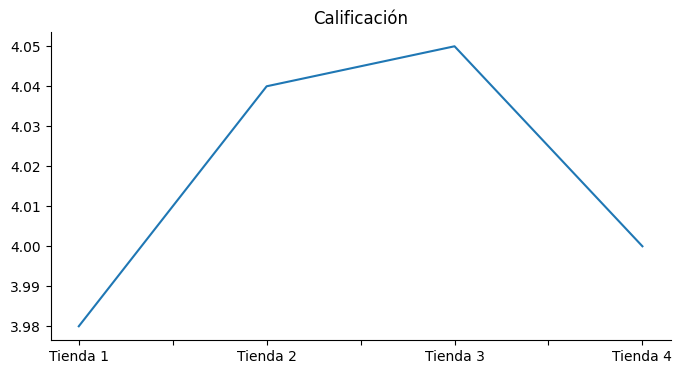

In [7]:
from matplotlib import pyplot as plt
calificacion_promedio['Calificación'].plot(kind='line', figsize=(8, 4), title='Calificación')
plt.gca().spines[['top', 'right']].set_visible(False)

# 4. Productos más y menos vendidos

In [9]:
# Productos mas y menos vendidos de las 4 tiendas:
ventas_tienda = pd.concat([tienda['Producto'].value_counts(), tienda2['Producto'].value_counts(), tienda3['Producto'].value_counts(), tienda4['Producto'].value_counts()], axis=1)
ventas_tienda.columns = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas_tienda = ventas_tienda.fillna(0)
ventas_tienda = ventas_tienda.astype(int)
ventas_tienda = ventas_tienda.sort_values(by='Tienda 1', ascending=False)
ventas_tienda

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Producto,,,,
Microondas,60,62,36,48
TV LED UHD 4K,60,45,42,40
Armario,60,54,49,34
Secadora de ropa,58,57,45,40
Mesa de noche,56,44,55,55
Bloques de construcción,56,54,35,54
Balón de baloncesto,55,42,50,50
Bicicleta,54,45,52,45
Vaso térmico,54,47,38,48


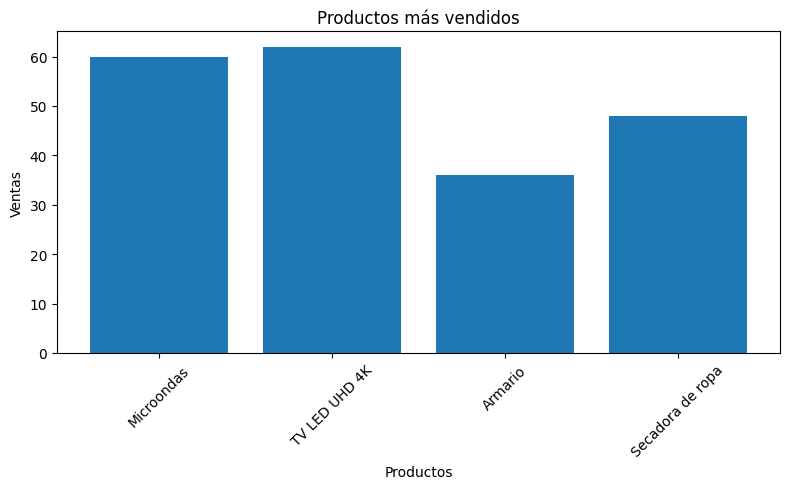

In [13]:
# Primer grafico los 4 productos mas vendidos de las tiendas
import matplotlib.pyplot as plt
import numpy as np

Prodcuto_vendido_tienda = ventas_tienda.head(4)
nombres_productos = Prodcuto_vendido_tienda.index.tolist()
ventas_productos = Prodcuto_vendido_tienda.values.tolist()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_productos, ventas_productos[0])
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.title('Productos más vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


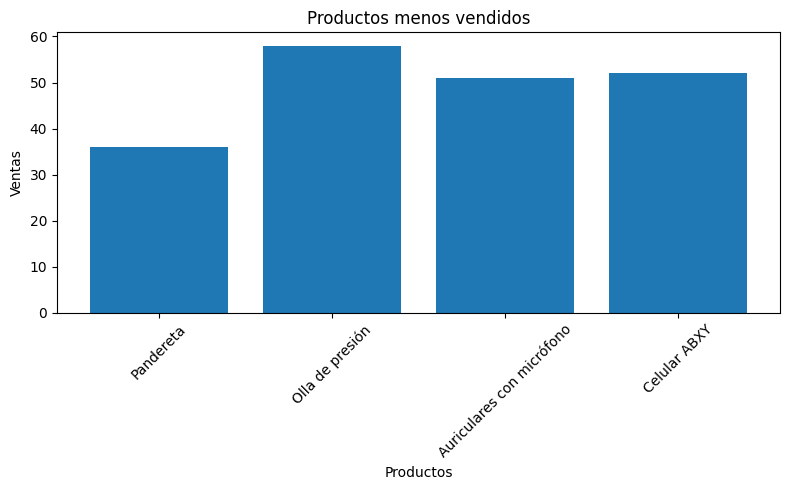

In [54]:
#Segundo grafico los 4 productos menos vendidos de las tiendas:
import matplotlib.pyplot as plt
import numpy as np

Prodcuto_vendido_tienda = ventas_tienda.tail(4)
nombres_productos = Prodcuto_vendido_tienda.index.tolist()
ventas_productos = Prodcuto_vendido_tienda.values.tolist()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres_productos, ventas_productos[0])
plt.xlabel('Productos')
plt.ylabel('Ventas')
plt.title('Productos menos vendidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

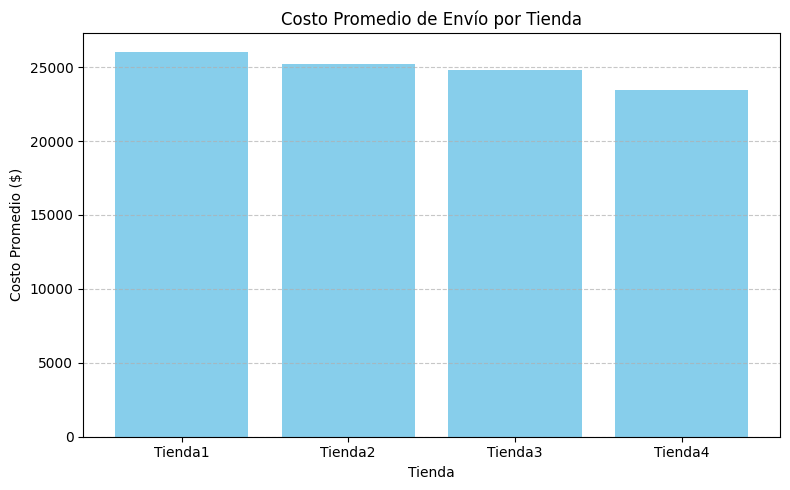

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Función sin formatear como texto
def promedio_envios(df):
    envio_tienda = df['Costo de envío'].mean()
    envio_tienda = round(envio_tienda, 2)
    return envio_tienda

# Aplicamos la función
T1 = promedio_envios(tienda)
T2 = promedio_envios(tienda2)
T3 = promedio_envios(tienda3)
T4 = promedio_envios(tienda4)

# Creamos el DataFrame
promedio_envios_df = pd.DataFrame({
    'Tienda': ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4'],
    'Costo Promedio de Envío': [T1, T2, T3, T4]
})

# Creamos el grafico
plt.figure(figsize=(8,5))
plt.bar(promedio_envios_df['Tienda'], promedio_envios_df['Costo Promedio de Envío'], color='skyblue')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()